In [4]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
# Load the netCDF4 file
ds = xr.open_dataset("CESM2_200001-201412.nc", engine="netcdf4")
surface_T = ds.tas.isel(time=-1)
surface_T
# Plate Carree projection
#ccrs.PlateCarree()

# # Show more details of the Plate Carree projection
# print(ccrs.PlateCarree())

# # Check the projection
# ccrs.PlateCarree?
# # Create and define the size of a figure object 
# plt.figure(figsize=(5,5), dpi=100)

# # Create an axes with an basic PlateCarree projection style
# proj = ccrs.PlateCarree()
# ax = plt.axes(projection=proj)

# # Add LAND feature to axes using cartopy.feature (cfeature)
# ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='grey', zorder=0)

C:\Users\Cao Zhe\Anaconda3\lib\site-packages\xarray\conventions.py:500: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


<xarray.DataArray 'tas' (lat: 192, lon: 288)>
array([[250.03975, 250.03975, 250.03975, ..., 250.03976, 250.03976, 250.03975],
       [250.7029 , 250.66605, 250.5141 , ..., 250.72615, 250.72278, 250.71268],
       [251.15924, 251.13344, 251.12349, ..., 251.34709, 251.30829, 251.25209],
       ...,
       [253.69547, 253.75377, 253.81009, ..., 253.54623, 253.59476, 253.64178],
       [253.26057, 253.28796, 253.31657, ..., 253.17091, 253.20187, 253.23189],
       [252.8665 , 252.86855, 252.8704 , ..., 252.85905, 252.86179, 252.86426]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    time     object 2014-12-15 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        TREFHT
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    long_name:      Near-Surface Air Temperature
    mipTable:       Amon
    out_name:       tas
    prov:           Amon ((isd.003))
    realm:          atmos
    standard_name:  air_temperature
    time:           time
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

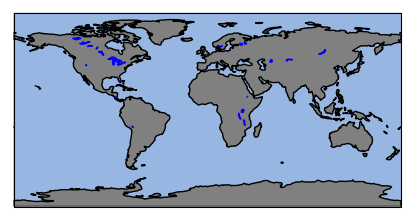

In [10]:
# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=100)

# Create an axes with an basic PlateCarree projection style
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

# Add features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='grey', zorder=1)
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue', zorder=2)

C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


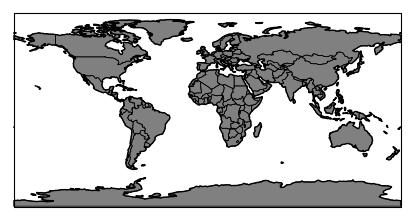

In [12]:
# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=100)

# Create an axes with an basic PlateCarree projection style
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

# Add features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.NaturalEarthFeature(category='physical',
                                           name='land',
                                           scale='110m',
                                           facecolor='gray',
                                           edgecolor='black',
                                           linewidth=1))

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

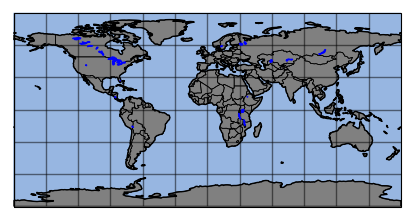

In [13]:
# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=100)

# Create an axes with an basic PlateCarree projection style
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

# Add natural features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='grey', zorder=1)
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue', zorder=2)

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# Add lat/lon gridlines, draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)

# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))

C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning:

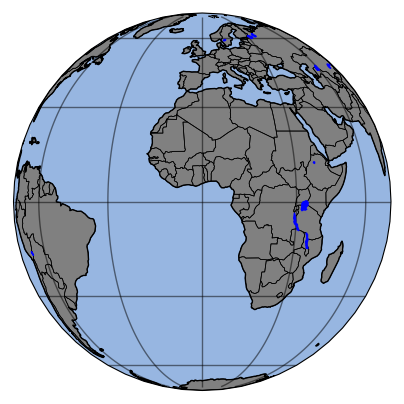

In [14]:
# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=100)

# Create an axes with Orthographic projection style
proj = ccrs.Orthographic()         
ax = plt.axes(projection=proj)

# Add natural features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='grey', zorder=1)
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue', zorder=2)

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# Add lat/lon gridlines, draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)

# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))

C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning:

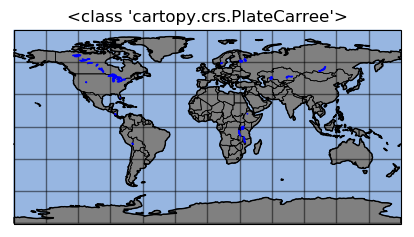

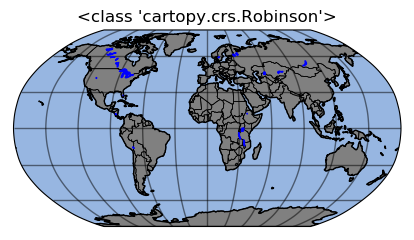

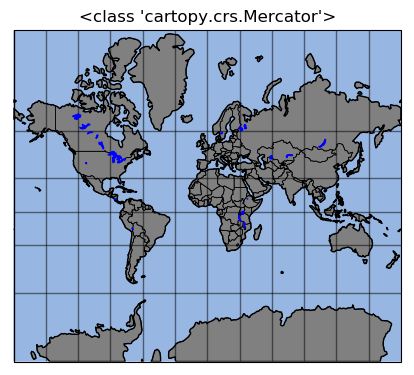

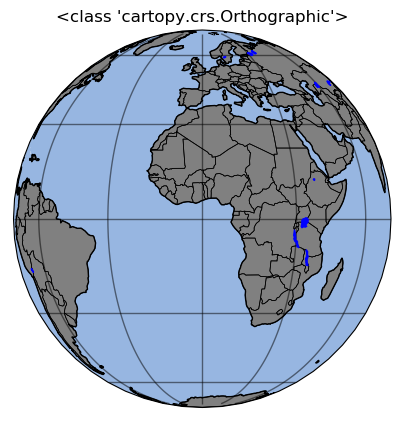

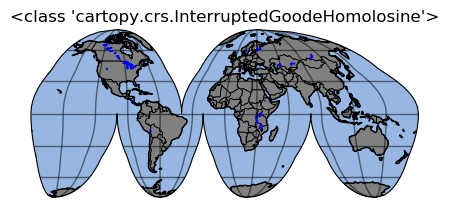

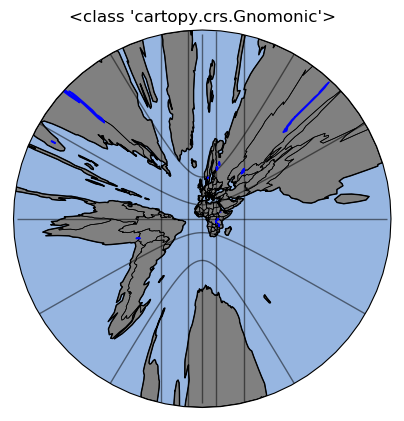

In [15]:
# Define plotting function
def plot_map(my_projection):
    # Create and define the size of a figure object 
    plt.figure(figsize=(5,5), dpi=100)
    
    # Create an axes with Orthographic projection style
    ax = plt.axes(projection=my_projection)

    # Add natural features to axes using cartopy.feature (cfeature)
    ax.add_feature(cfeature.OCEAN, zorder=0)
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='grey', zorder=1)
    ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue', zorder=2)

    # Add border lines over countries 
    ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

    # Add lat/lon gridlines, draw gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)

    # Manipulate latitude and longitude gridline numbers and spacing
    gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
    gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
    
    # Add title
    ax.set_title(f'{type(my_projection)}')
    
# Set a list of projections
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
               ccrs.InterruptedGoodeHomolosine(),
               ccrs.Gnomonic()
              ]

# Loop the projections and call the plotting function
for proj in projections:
    plot_map(proj)

C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: D

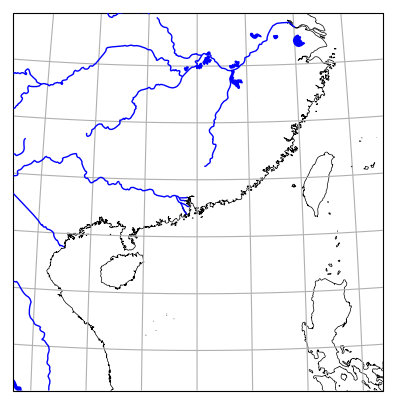

In [16]:
# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=100)

# Set Orthographic projection style
central_lon, central_lat = 114.06, 22.54 # Shenzhen
proj = ccrs.Orthographic(central_lon, central_lat) 

# Create an axes with Orthographic projection style
ax = plt.axes(projection=proj)

# Set a region and plot
extent = [central_lon-10, central_lon+10, central_lat-10, central_lat+10]
ax.set_extent(extent)

# Add features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue', zorder=2)
ax.add_feature(cfeature.RIVERS, edgecolor='blue', zorder=3)

# Add features to axes using methods
ax.coastlines(resolution='10m', linewidth=0.5)
ax.gridlines()

C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: D

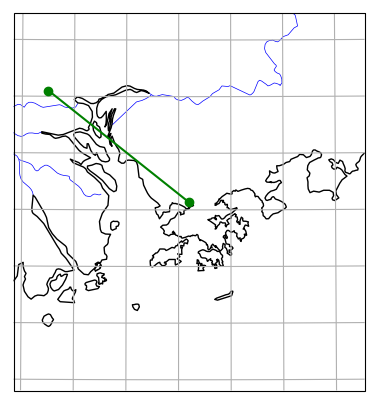

In [17]:
# Create some test data
Shenzhen = dict(lon=114.06, lat=22.54)
Guangzhou = dict(lon=113.25, lat=23.13)
lons = [Shenzhen['lon'], Guangzhou['lon']]
lats = [Shenzhen['lat'], Guangzhou['lat']]

# Now use higher-resolution features
rivers_10m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')

# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=100)

# Set Orthographic projection style
central_lon, central_lat = 114.06, 22.54 # Shenzhen
proj = ccrs.Orthographic(central_lon, central_lat) 

# Create an axes with Orthographic projection style
ax = plt.axes(projection=proj)

# Set a region and plot
extent = [central_lon-1, central_lon+1, central_lat-1, central_lat+1]
ax.set_extent(extent)

# Add features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue', zorder=2)
ax.add_feature(rivers_10m, facecolor='None', edgecolor='blue', linewidth=0.5)

# Add features to axes using coastlines method
ax.coastlines(resolution='10m')
ax.gridlines()

# Add two points
ax.plot(lons, lats, 'go-', transform=ccrs.PlateCarree())

C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecationWarning:

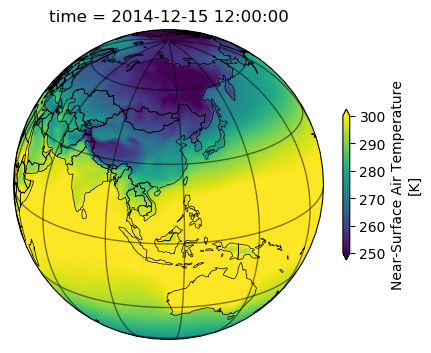

In [18]:
# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=100)

# Create an axes with Orthographic projection style
proj = ccrs.Orthographic(central_lon, central_lat) 
ax = plt.axes(projection=proj)

# Plot the surface temperature
surface_T.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=250, vmax=300, cbar_kwargs={'shrink': 0.4})

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# Add lat/lon gridlines, draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)

# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))

C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecationWarning:

Text(0.5,1,'No mask data only')

C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)


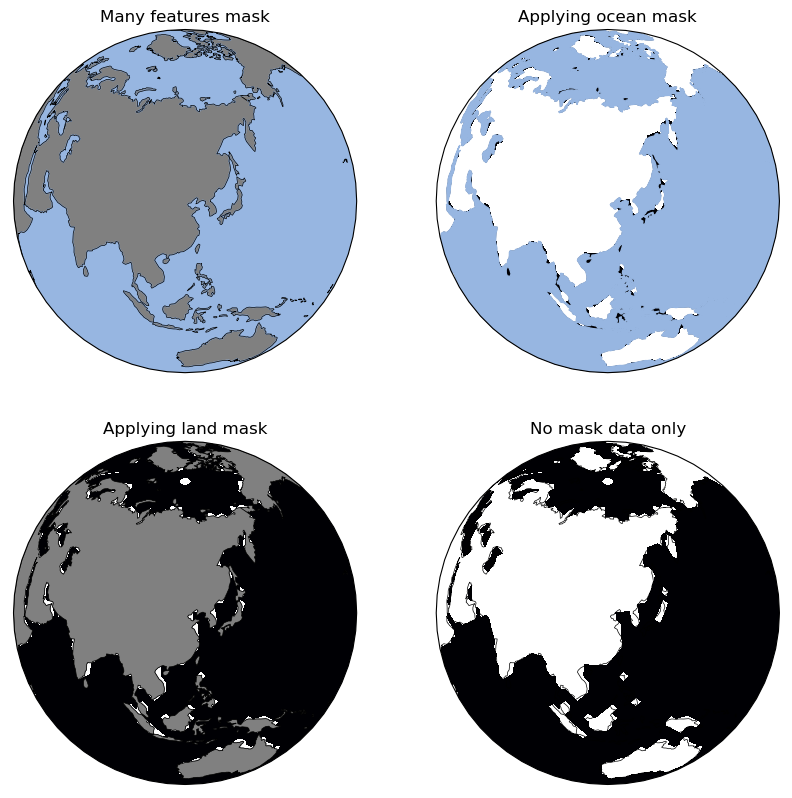

In [13]:
# Create and define the size of a figure object 
plt.figure(figsize=(10,10), dpi=100)

# Create an axes with Orthographic projection style
proj = ccrs.Orthographic(central_lon, central_lat) 

# Plot first panel
ax1 = plt.subplot(2, 2, 1, projection=proj)
ax1.coastlines(linewidths=0.5)
# Mask land, lakes, and oceans
ax1.add_feature(cfeature.LAND, edgecolor='black', facecolor='grey',linewidths=0.5)
ax1.add_feature(cfeature.OCEAN)
plt.title("Many features mask")

# Plot second plot
ax2 = plt.subplot(2, 2, 2, projection=proj)
ax2.coastlines(linewidths=0.5)
# Contourf-plot data
surface_T.plot.contourf(ax=ax2, transform=ccrs.PlateCarree(),
               vmin=250, vmax=300, levels=11, cmap='magma',
               add_colorbar=False)
# Mask ocean data by adding ocean feature and changing its zorder
ax2.add_feature(cfeature.OCEAN, zorder=1)
plt.title("Applying ocean mask")

# Plot third plot
ax3 = plt.subplot(2, 2, 3, projection=proj)
ax3.coastlines(linewidths=0.5)
# Contourf-plot data
surface_T.plot.contourf(ax=ax3, transform=ccrs.PlateCarree(),
               vmin=250, vmax=300, levels=11, cmap='magma',
               add_colorbar=False)
# Mask land data by adding land feature and changing its zorder
ax3.add_feature(cfeature.LAND, edgecolor='black', facecolor='grey',
                linewidths=0.5, zorder=1)
plt.title("Applying land mask")

# Plot fourth plot
ax4 = plt.subplot(2, 2, 4, projection=proj)
ax4.coastlines(linewidths=0.5)
# Contourf-plot data
surface_T.plot.contourf(ax=ax4, transform=ccrs.PlateCarree(),
               vmin=250, vmax=300, levels=11, cmap='magma',
               add_colorbar=False)
plt.title("No mask data only")

C:\Users\Cao Zhe\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


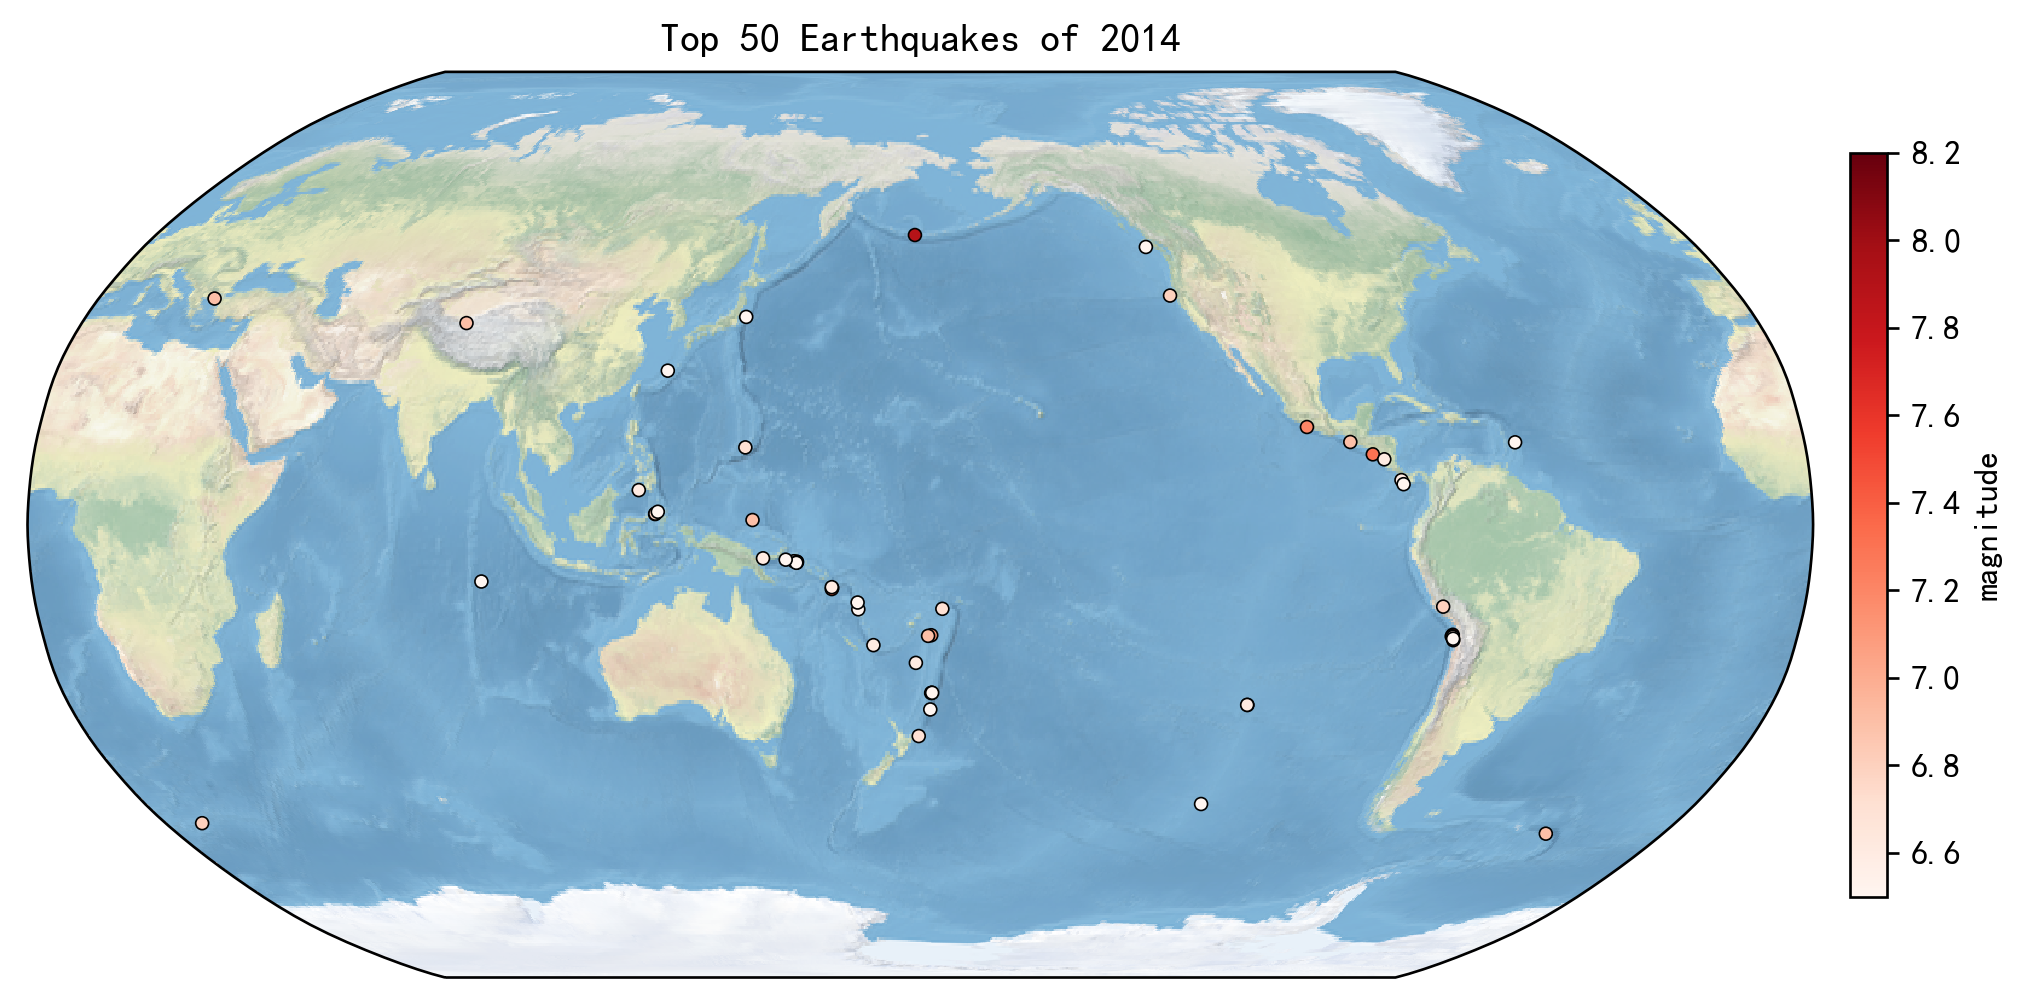

In [35]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
Sig_Eqs = pd.read_csv('usgs_earthquakes.csv')
Eqs_location_mag = Sig_Eqs[['latitude','longitude','mag']]
Eqs_location_mag.sort_values(by = 'mag',axis =0,ascending=False,inplace=True)
Eqs_location_mag_top50 = Eqs_location_mag[:54] #选前50个，但是第51个到54个都是和第五十个一样mag为6.5,所以都算在前50了，否则图会比题目给的少几个点
Eqs_location_mag_top50
lat = Eqs_location_mag_top50['latitude'].values
lon = Eqs_location_mag_top50['longitude'].values
mag = Eqs_location_mag_top50['mag'].values
Eqs_location_mag_top50 = Eqs_location_mag_top50.reset_index(drop=True)
max_mag = Eqs_location_mag_top50['mag'][0]
min_mag = Eqs_location_mag_top50['mag'][53]
plt.figure(figsize=(10,5), dpi=240)
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.stock_img()
ax.scatter(lon,lat,c=mag ,transform=ccrs.PlateCarree(),vmin= min_mag, vmax= max_mag , cmap='Reds',
           marker='o',edgecolors='k',s=15, linewidths=0.5)
cb=ax.figure.colorbar(ax.collections[0],fraction=0.02, pad=0.02,label = 'magnitude') #显示colorbar
ax.set_title('Top 50 Earthquakes of 2014')
plt.show()


C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:297: 

Text(117,20,'北京')

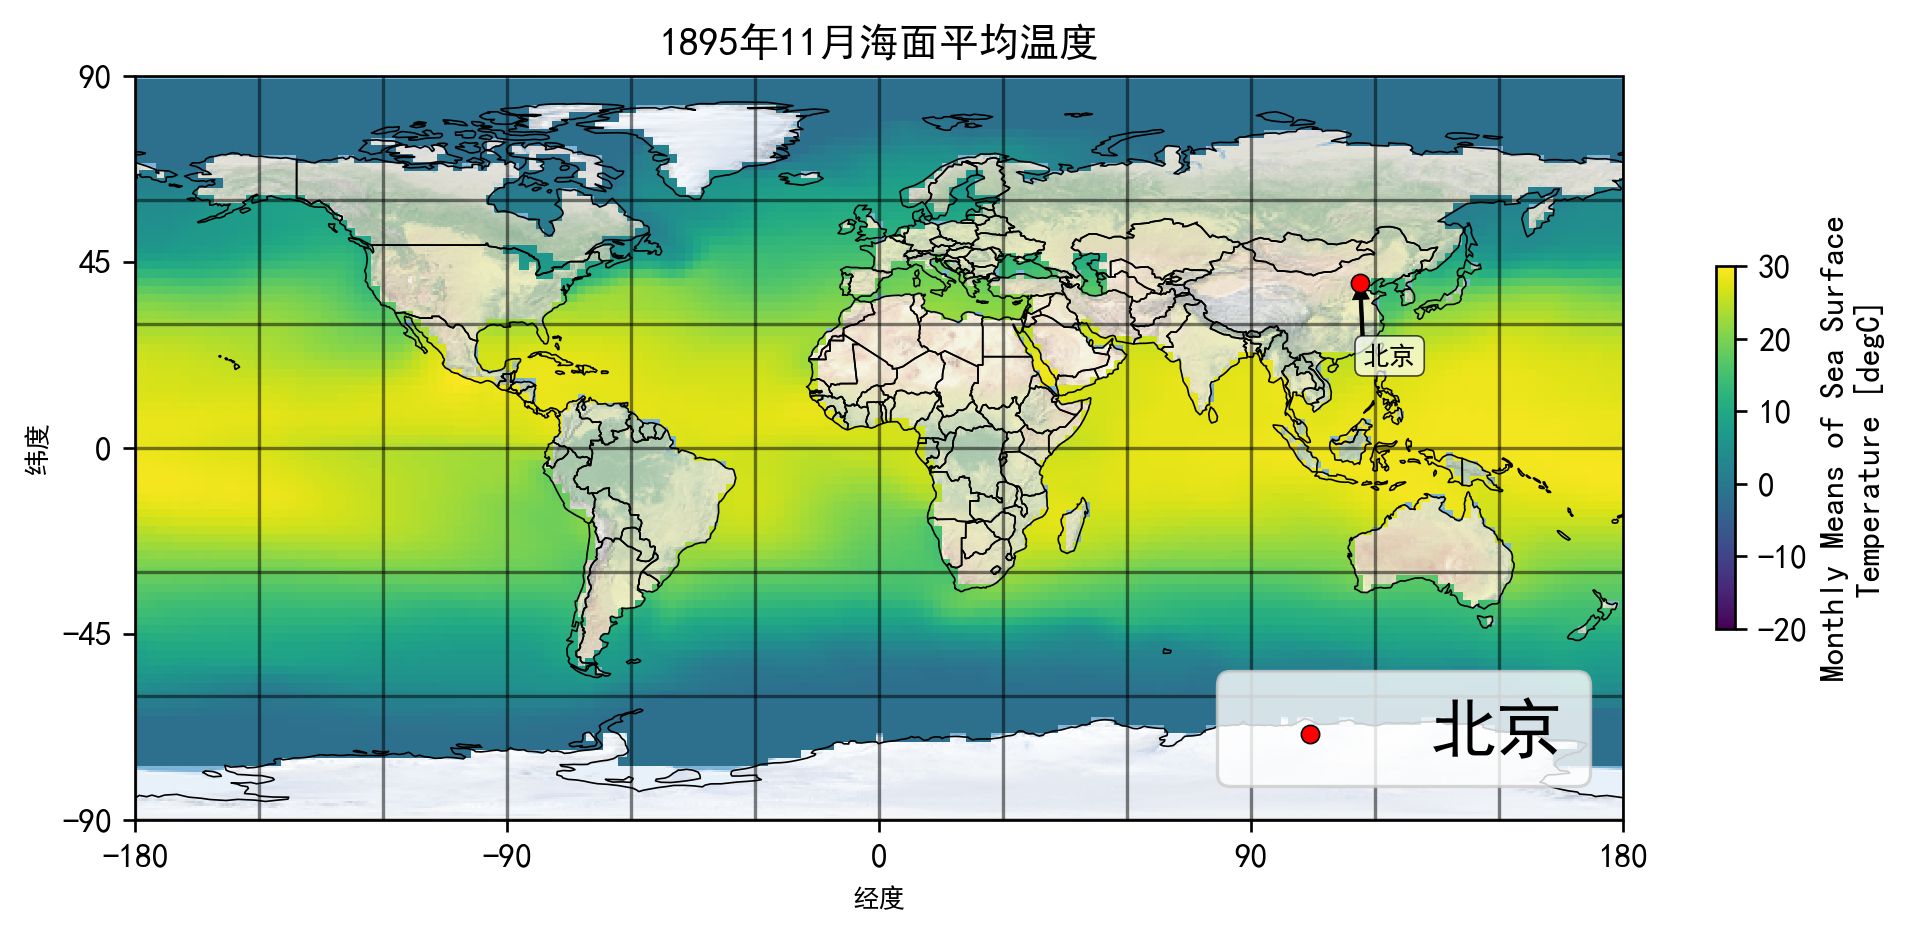

In [42]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False #解决中文及负号乱码问题

ds = xr.open_dataset('sst.mnmean.nc', engine="netcdf4")
surface_T = ds.sst.isel(time=502)
# Create and define the size of a figure object 
plt.figure(figsize=(10,5), dpi=240)
# Create an axes with Orthographic projection style
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
# Plot the surface temperature
surface_T.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=-20, vmax=30, cbar_kwargs={'shrink': 0.4})
ax.stock_img()
# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))
#设置X轴及Y轴及label
ax.tick_params(labelsize=10)
ax.set_xticks(np.linspace(-180, 180, 5), crs=ccrs.PlateCarree())
ax.set_yticks(np.linspace(-90, 90, 5), crs=ccrs.PlateCarree())
ax.set_xlabel('经度',fontsize=8)
ax.set_ylabel('纬度',fontsize=8)

ax.set_title('1895年11月海面平均温度')
#设置网格
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
#masks or feature
ax.scatter(116.3,39.9,s=30,c='r',marker='o',label='北京',zorder=5,edgecolors='k', linewidths=0.5)
ax.legend(loc=4,fontsize=20)
ax.annotate('北京',xy=(116.3,39.9),xytext=(117,20),fontsize=8,
             arrowprops=dict(lw=0.3,width=1,headwidth=5,headlength=5,color='k'),
             bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.7))

